In [1]:

EMBEDDING_PATH = "./dataset_embedding/"
CPU_ARCH = "x86_64"
LOG_PATH = "./logs/"


In [2]:
# loading dataset
import pickle


with open(f"{EMBEDDING_PATH}{CPU_ARCH}_tfidf_vec_train.pickle", "rb") as f:
    X_train = pickle.load(f)
with open(f"{EMBEDDING_PATH}{CPU_ARCH}_y_train.pickle", "rb") as f:
    y_train = pickle.load(f)
with open(f"{EMBEDDING_PATH}{CPU_ARCH}_label_mapping.pickle", "rb") as f:
    label_mapping = pickle.load(f)

print("Dataset loaded")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {len(y_train)}")
print(f"Label mapping: {label_mapping}")

Dataset loaded
X_train shape: (2000, 1000)
y_train shape: 2000
Label mapping: {0: 'camelot', 1: 'gafgyt', 2: 'meterpreter', 3: 'mirai', 4: 'ngioweb', 5: 'rekoobe', 6: 'sliver', 7: 'sshdoor', 8: 'tsunami', 9: 'xmrig'}


In [3]:
# traverse all families
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import learning_curve, GridSearchCV
from BaseSVDD import BaseSVDD
import pickle

param_grid = [
    {"kernel": ["rbf"], "gamma": [0.1, 0.2, 0.5], "C": [0.1, 0.5, 1]},
    {"kernel": ["linear"], "C": [0.1, 0.5, 1]},
    {"kernel": ["poly"], "C": [0.1, 0.5, 1], "degree": [2, 3, 4, 5]},
]

svdd_family_list = np.array([])
best_params_list = np.array([])
best_score_list = np.array([])
tsne = TSNE(n_components=2)
svddGrid = GridSearchCV(BaseSVDD(display='off'), param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=0)
with open(f"{LOG_PATH}{CPU_ARCH}_svdd.log", "w") as f:
    with open(f"{LOG_PATH}{CPU_ARCH}_svdd.pickle", "wb") as f2:
        for index_pos in label_mapping.keys():
            family_pos = index_pos
            for index_neg in label_mapping.keys():
                if index_neg == index_pos:
                    continue
                family_neg = index_neg
                svdd_family_list = np.concatenate((svdd_family_list, [family_pos, family_neg]))
                f.write(f"Family pos: {label_mapping[family_pos]}, Family neg: {label_mapping[family_neg]}\n")
                # print(f"Family pos: {label_mapping[family_pos]}, Family neg: {label_mapping[family_neg]}")
                X_train_family = np.concatenate((X_train[y_train == family_pos], X_train[y_train == family_neg]))
                y_train_family = np.concatenate((y_train[y_train == family_pos], y_train[y_train == family_neg]))

                y_train_family = [1 if y == family_pos else -1 for y in y_train_family]
                y_train_family = np.array(y_train_family)
                y_train_family = y_train_family.reshape(-1, 1)
                X_train_family_tsne = tsne.fit_transform(X_train_family)

                svddGrid.fit(X_train_family_tsne, y_train_family)
                f.write("best parameters:\n")
                f.write(str(svddGrid.best_params_))
                best_params_list = np.concatenate((best_params_list, [svddGrid.best_params_]))
                f.write("\n")
                f.write("best score:\n")
                f.write(str(svddGrid.best_score_))
                best_score_list = np.concatenate((best_score_list, [svddGrid.best_score_]))
                f.write("\n\n")
                # print("best parameters:")
                # print(svdd.best_params_)
                # print("best score:")
                # print(svdd.best_score_)
                # print("\n")
    f.close()


/home/mandy900619/Tools/Anaconda/envs/byteSequence/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/home/mandy900619/experiment/byteSequence/prototype_learning/BaseSVDD.py:273: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")
/home/mandy900619/experiment/byteSequence/prototype_learning/BaseSVDD.py:273: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")
/home/mandy900619/experiment/byteSequence/prototype_learning/BaseSVDD.py:273: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")
/home/mandy900619/experiment/byteSequence/prototype_learning/BaseSVDD.py:273: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")
/home/mand

In [4]:
with open(f"{LOG_PATH}{CPU_ARCH}_svdd.pickle", "wb") as f:
    pickle.dump(svdd_family_list, f)
    pickle.dump(best_params_list, f)
    pickle.dump(best_score_list, f)
    f.close()

In [15]:
for i in range(0, len(svdd_family_list), 2):
    print(f"Family pos: {label_mapping[svdd_family_list[i]]}, Family neg: {label_mapping[svdd_family_list[i + 1]]}")
    index = i // 2
    print(f"Best parameters: {best_params_list[index]}")
    print(f"Best score: {best_score_list[index]}")
    print("\n")

Family pos: camelot, Family neg: gafgyt
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.9574999999999999


Family pos: camelot, Family neg: meterpreter
Best parameters: {'C': 0.5, 'kernel': 'linear'}
Best score: 0.9675


Family pos: camelot, Family neg: mirai
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.8450000000000001


Family pos: camelot, Family neg: ngioweb
Best parameters: {'C': 0.5, 'degree': 2, 'kernel': 'poly'}
Best score: 0.99


Family pos: camelot, Family neg: rekoobe
Best parameters: {'C': 0.1, 'degree': 4, 'kernel': 'poly'}
Best score: 0.95


Family pos: camelot, Family neg: sliver
Best parameters: {'C': 1, 'degree': 5, 'kernel': 'poly'}
Best score: 0.8125


Family pos: camelot, Family neg: sshdoor
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.8575000000000002


Family pos: camelot, Family neg: tsunami
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.9674999999999999


Family pos: camelot, Family neg: xmrig
Best p

In [17]:
n_families = len(label_mapping)
average_score = np.empty(n_families)
for i in range(len(best_score_list)):
    average_score[i // (n_families - 1)] += best_score_list[i]

average_score /= (n_families - 1)
print("Average score:")
for i in range(n_families):
    print(f"Family: {label_mapping[i]}, Average score: {average_score[i]}")


Average score:
Family: camelot, Average score: 0.9025000000000001
Family: gafgyt, Average score: 0.8761111111111111
Family: meterpreter, Average score: 0.6908333333333333
Family: mirai, Average score: 0.8672222222222222
Family: ngioweb, Average score: 0.9613888888888891
Family: rekoobe, Average score: 0.8152777777777778
Family: sliver, Average score: 0.7872222222222223
Family: sshdoor, Average score: 0.9347222222222222
Family: tsunami, Average score: 0.8830555555555555
Family: xmrig, Average score: 0.8699999999999999


In [67]:
# load specific family
import numpy as np
# get family pos label with value
FAMILY_POS = "camelot"
FAMILY_NEG = "sshdoor"


family_pos = list(label_mapping.keys())[list(label_mapping.values()).index(FAMILY_POS)]
family_neg = list(label_mapping.keys())[list(label_mapping.values()).index(FAMILY_NEG)]

X_train_family = np.concatenate((X_train[y_train == family_pos], X_train[y_train == family_neg]))
y_train_family = np.concatenate((y_train[y_train == family_pos], y_train[y_train == family_neg]))

# numpy array
y_train_family = [1 if y == family_pos else -1 for y in y_train_family]
y_train_family = np.array(y_train_family)
y_train_family = y_train_family.reshape(-1, 1)

print(f"X_train_family shape: {X_train_family.shape}")
print(f"y_train_family shape: {y_train_family.shape}")

X_train_family shape: (400, 1000)
y_train_family shape: (400, 1)




*** Fitting of the SVDD model is completed. ***

running time         = 0.2052 seconds
kernel function      = linear
iterations           = 23
number of samples    = 400
number of features   = 2
number of SVs        = 12
ratio of SVs         = 3.0000 %
accuracy             = 85.5000 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.0295 seconds



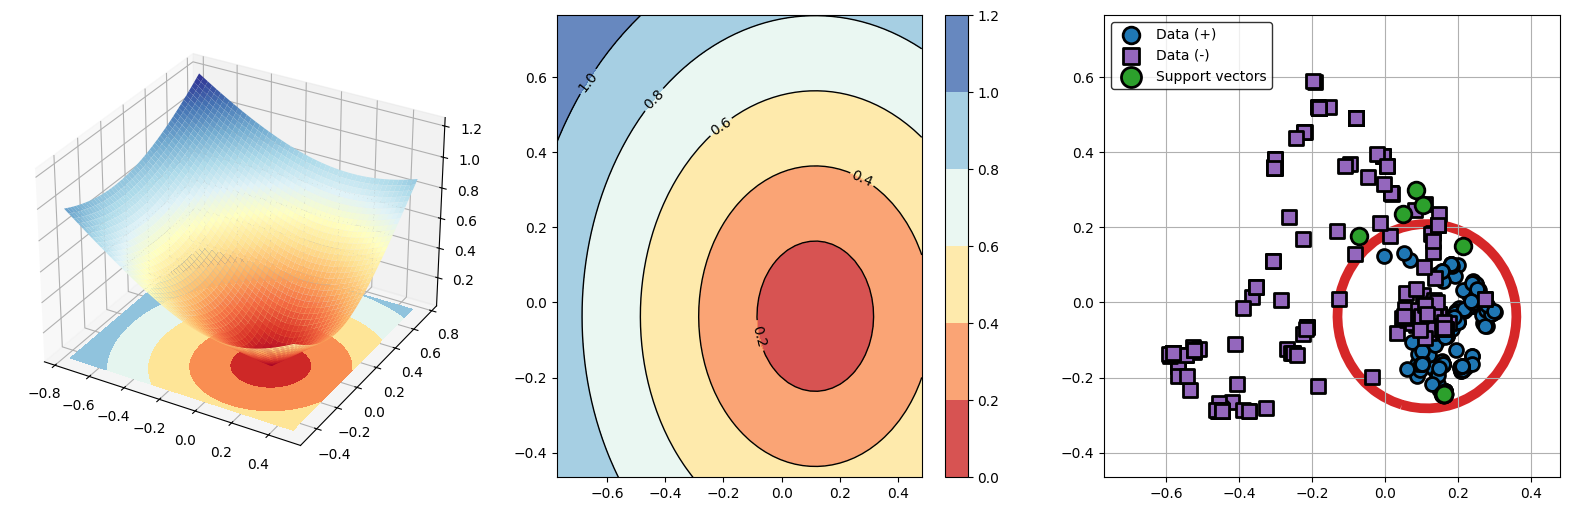

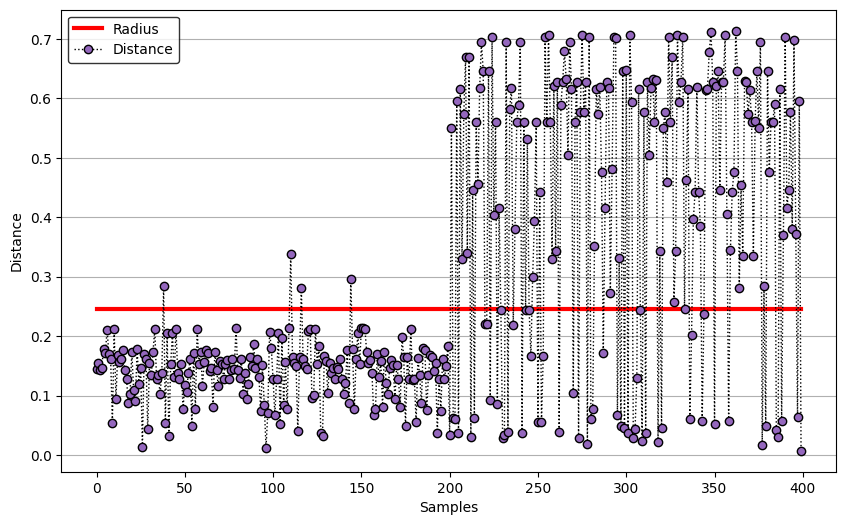

In [68]:
from BaseSVDD import BaseSVDD
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_family_pca = pca.fit_transform(X_train_family)
svdd = BaseSVDD(C=0.1,kernel='linear', display='on')

svdd.fit(X_train_family_pca, y_train_family)
svdd.plot_boundary(X_train_family_pca, y_train_family)
radius = svdd.radius
distance = svdd.get_distance(X_train_family_pca)
svdd.plot_distance(radius, distance)

In [69]:
# grid search
from sklearn.model_selection import learning_curve, GridSearchCV

param_grid = [
    {"kernel": ["rbf"], "gamma": [0.1, 0.2, 0.5], "C": [0.1, 0.5, 1]},
    {"kernel": ["linear"], "C": [0.1, 0.5, 1]},
    {"kernel": ["poly"], "C": [0.1, 0.5, 1], "degree": [2, 3, 4, 5]},
]

svdd = GridSearchCV(BaseSVDD(display='off'), param_grid, cv=5, scoring="accuracy")
svdd.fit(X_train_family_pca, y_train_family)
print("best parameters:")
print(svdd.best_params_)
print("\n")
print("best score:")
print(svdd.best_score_)
print("\n")


best parameters:
{'C': 0.1, 'kernel': 'linear'}


best score:
0.8525




/home/mandy900619/Tools/Anaconda/envs/byteSequence/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,




*** Fitting of the SVDD model is completed. ***

running time         = 0.1072 seconds
kernel function      = rbf
iterations           = 14
number of samples    = 400
number of features   = 2
number of SVs        = 70
ratio of SVs         = 17.5000 %
accuracy             = 84.5000 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.0894 seconds



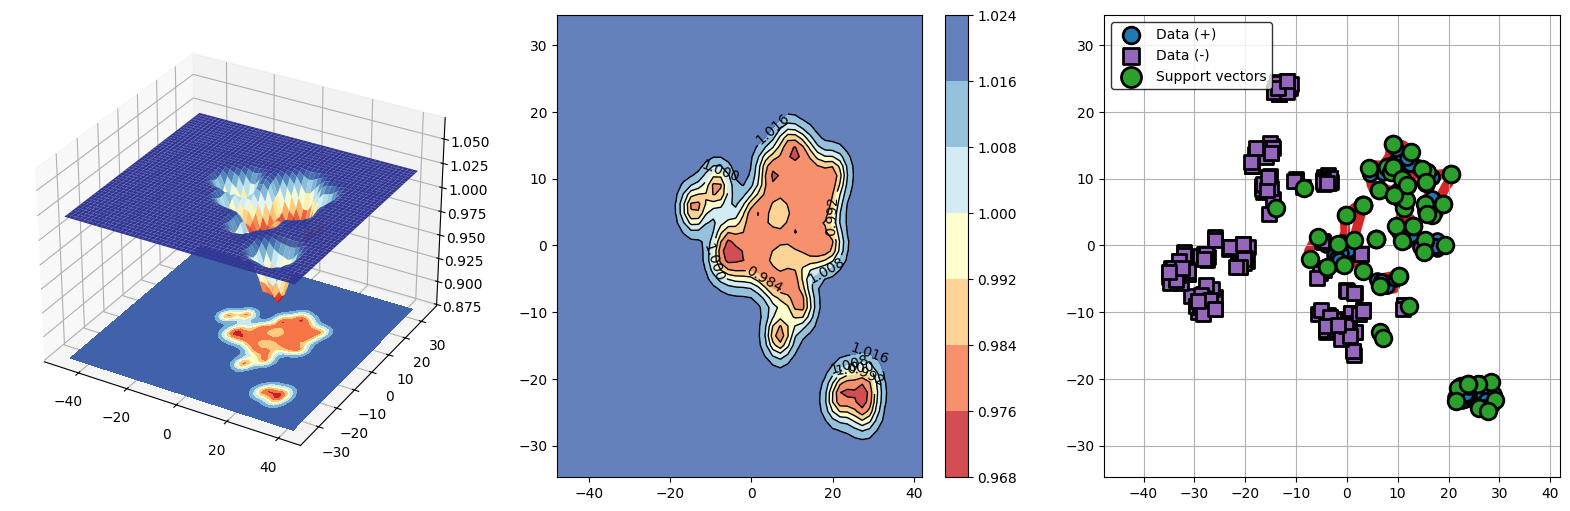

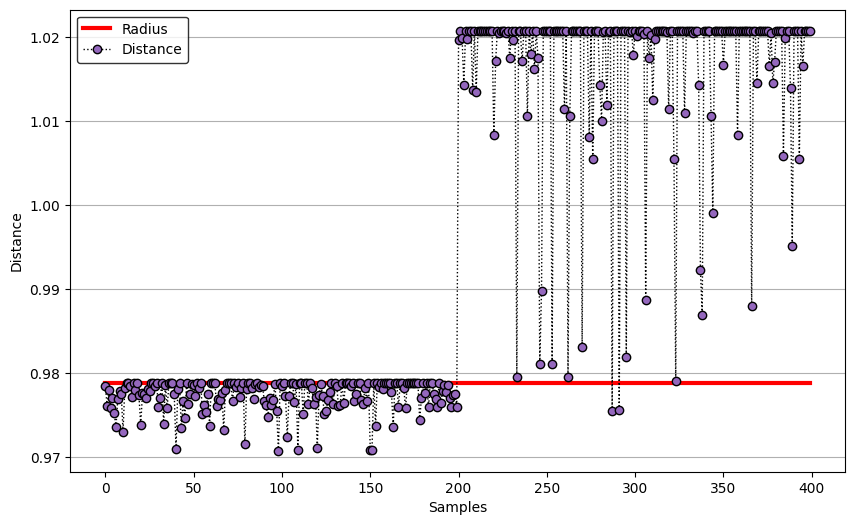

In [70]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_train_family_tsne = tsne.fit_transform(X_train_family)

svdd = BaseSVDD(C=0.1, gamma=0.1, kernel='rbf', display='on')

svdd.fit(X_train_family_tsne, y_train_family)
svdd.plot_boundary(X_train_family_tsne, y_train_family)

radius = svdd.radius
distance = svdd.get_distance(X_train_family_tsne)
svdd.plot_distance(radius, distance)

In [72]:
# grid search
from sklearn.model_selection import learning_curve, GridSearchCV

param_grid = [
    {"kernel": ["rbf"], "gamma": [0.1, 0.2, 0.5], "C": [0.1, 0.5, 1]},
    {"kernel": ["linear"], "C": [0.1, 0.5, 1]},
    {"kernel": ["poly"], "C": [0.1, 0.5, 1], "degree": [2, 3, 4, 5]},
]

svdd = GridSearchCV(BaseSVDD(display='off'), param_grid, cv=5, scoring="accuracy")
svdd.fit(X_train_family_tsne, y_train_family)
print("best parameters:")
print(svdd.best_params_)
print("\n")
print("best score:")
print(svdd.best_score_)
print("\n")

best parameters:
{'C': 0.1, 'kernel': 'linear'}


best score:
0.8550000000000001


0.807 (+/-0.310) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.747 (+/-0.437) for {'C': 0.1, 'gamma': 0.2, 'kernel': 'rbf'}
0.693 (+/-0.548) for {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}
0.802 (+/-0.321) for {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
0.745 (+/-0.437) for {'C': 0.5, 'gamma': 0.2, 'kernel': 'rbf'}
0.677 (+/-0.571) for {'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}
0.807 (+/-0.306) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.742 (+/-0.437) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.688 (+/-0.548) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.855 (+/-0.198) for {'C': 0.1, 'kernel': 'linear'}
0.830 (+/-0.273) for {'C': 0.5, 'kernel': 'linear'}
0.830 (+/-0.273) for {'C': 1, 'kernel': 'linear'}
0.693 (+/-0.275) for {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
0.802 (+/-0.103) for {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
0.812 (+/-0.241) for {'C': 0.1, 'degree': 4, 'kernel': 'poly'}
0.780 (+/-0.3